In [1]:
import numpy as np
from bandit import NArmedBandit
from tqdm import tqdm
import matplotlib.pyplot as plt
palettes = [
    '#D870AD', '#B377D9', '#7277D5', 
    '#4B8CDC', '#3BB1D9', '#3BBEB0', 
    '#3BB85D', '#82C250', '#B0C151', 
    '#F5BA42', '#F59B43', '#E7663F', 
    '#D94C42']

An $n$-armed bandit offers $n$ different options called *actions* ($\{a_\mu\}_{\mu=1}^n$); after each choice you receive a numerical reward $R_i(a_\mu)$ drawn from a stationary distribution $\phi_\mu$.

The objective is maximize the expected total reward over some time period, where each selection of action is called a play.

The value of action $a$ is  $\mathcal Q(a) = \mathbb E [R(a)]$, which is approximated by sample mean
$Q_t (a) = \frac{1}{n_a} \sum_{j=1}^{n_a} R_j(a)$ where $0 < n_a \le t$; if $n_a = 0$, set $Q_t(a)$ to a default value, e.g. 0.

The greedy action $a^* = \arg \max_a Q_t(a)$. The $\epsilon$-greedy action is chosen for small probability $\epsilon$

In [2]:
n_fold = 200
t_max = 500
n_arms = 10

X_ = []
Y_ = []
Z_ = []
W_ = []
reward_cache = []
for fold in tqdm(range(n_fold)):
    reward_values_ = np.random.normal(0,1, size=n_arms)
    reward_cache.append(reward_values_)
    X = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='greedy', optimistic_init=5)
    Y = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='eps-greedy', eps=0.01, optimistic_init=5)
    Z = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='eps-greedy', eps=0.1, optimistic_init=5)
    W = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='eps-greedy', eps=0.5, optimistic_init=5)
    for t in range(t_max):
        X.play()
        Y.play()
        Z.play()
        W.play()
    X_.append(X)
    Y_.append(Y)
    Z_.append(Z)
    W_.append(W)

100%|██████████| 200/200 [01:00<00:00,  3.12it/s]


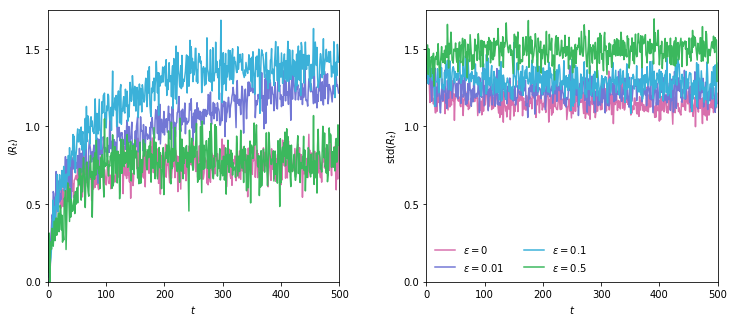

In [4]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.3)
fold_average_reward_ = np.zeros((t_max, n_fold))
ax1 = plt.subplot(121)
ax1.set_yticks([0,0.5,1,1.5,2])
plt.xlim(0, t_max)
plt.ylim(0, 1.75)
ax2 = plt.subplot(122)
ax2.set_yticks([0,0.5,1,1.5,2])
plt.xlim(0, t_max)
plt.ylim(0, 1.75)
for idx, (l, B_) in enumerate([(r'$\epsilon=0$', X_), (r'$\epsilon=0.01$', Y_), (r'$\epsilon=0.1$', Z_), (r'$\epsilon=0.5$', W_)]):
    for fold in range(n_fold):
        fold_average_reward_[:,fold] = np.array(B_[fold].reward_history_)


    ax1.plot(range(t_max), fold_average_reward_.mean(axis=1), label=l, c=palettes[idx*2])
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$\langle R_t \rangle$')
    ax2.plot(range(t_max), fold_average_reward_.std(axis=1), label=l, c=palettes[idx*2])
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel(r'$ {\rm std}(R_t) $')
ax2.legend(loc=0, ncol=2, frameon=False)
plt.show()

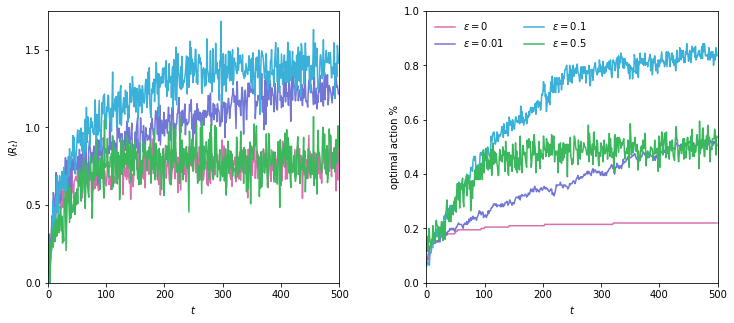

In [5]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.3)
fold_average_reward_ = np.zeros((t_max, n_fold))
ax1 = plt.subplot(121)
ax1.set_yticks([0,0.5,1,1.5,2])
plt.xlim(0, t_max)
plt.ylim(0, 1.75)
ax2 = plt.subplot(122)
plt.xlim(0, t_max)
plt.ylim(0, 1)

for idx, (l, B_) in enumerate([(r'$\epsilon=0$', X_), (r'$\epsilon=0.01$', Y_), (r'$\epsilon=0.1$', Z_), (r'$\epsilon=0.5$', W_)]):
    fold_average_optimal_fraction_ = np.zeros((t_max, n_fold))
    fold_average_reward_ = np.zeros((t_max, n_fold))
    for fold in range(n_fold):
        fold_average_optimal_fraction_[:,fold] += (np.array(B_[fold].action_history_) == np.argmax(reward_cache[fold]))*1
        fold_average_reward_[:,fold] = np.array(B_[fold].reward_history_)


    ax1.plot(range(t_max), fold_average_reward_.mean(axis=1), label=l, c=palettes[idx*2])
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$\langle R_t \rangle$')
    
    ax2.plot(range(t_max), fold_average_optimal_fraction_.sum(axis=1)/n_fold, label=l, c=palettes[idx*2])
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel('optimal action %')

ax2.legend(loc=0, ncol=2, frameon=False)
plt.show()

In [6]:
n_fold = 200
t_max = 500
n_arms = 10

X_ = []
Y_ = []
Z_ = []
W_ = []
S_ = []
reward_cache = []
for fold in tqdm(range(n_fold)):
    reward_values_ = np.random.normal(0,1, size=n_arms)
    reward_cache.append(reward_values_)
    X = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='greedy', optimistic_init=5)
    Y = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='softmax', beta=0.1, optimistic_init=5)
    Z = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='softmax', beta=1, optimistic_init=5)
    W = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='softmax', beta=5, optimistic_init=5)
    S = NArmedBandit(n_arms, [reward_values_, [1]*n_arms], decision='softmax', beta=10, optimistic_init=5)
    for t in range(t_max):
        X.play()
        Y.play()
        Z.play()
        W.play()
        S.play()
    X_.append(X)
    Y_.append(Y)
    Z_.append(Z)
    W_.append(W)
    S_.append(S)

100%|██████████| 200/200 [01:03<00:00,  3.26it/s]


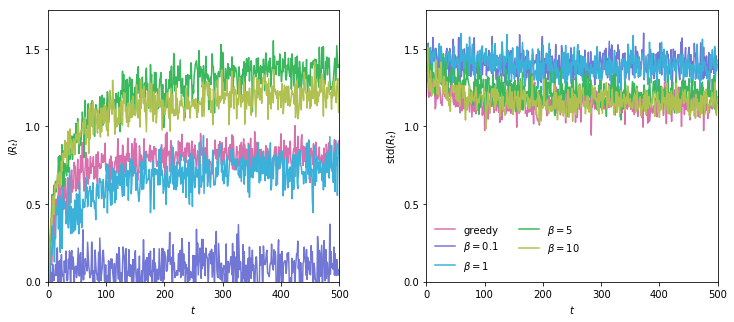

In [7]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.3)
fold_average_reward_ = np.zeros((t_max, n_fold))
ax1 = plt.subplot(121)
ax1.set_yticks([0,0.5,1,1.5,2])
plt.xlim(0, t_max)
plt.ylim(0, 1.75)
ax2 = plt.subplot(122)
ax2.set_yticks([0,0.5,1,1.5,2])
plt.xlim(0, t_max)
plt.ylim(0, 1.75)
for idx, (l, B_) in enumerate([(r'greedy', X_), (r'$\beta=0.1$', Y_), (r'$\beta=1$', Z_), (r'$\beta=5$', W_), (r'$\beta=10$', S_)]):
    for fold in range(n_fold):
        fold_average_reward_[:,fold] = np.array(B_[fold].reward_history_)


    ax1.plot(range(t_max), fold_average_reward_.mean(axis=1), label=l, c=palettes[idx*2])
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$\langle R_t \rangle$')
    ax2.plot(range(t_max), fold_average_reward_.std(axis=1), label=l, c=palettes[idx*2])
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel(r'$ {\rm std}(R_t) $')
ax2.legend(loc=0, ncol=2, frameon=False)
plt.show()

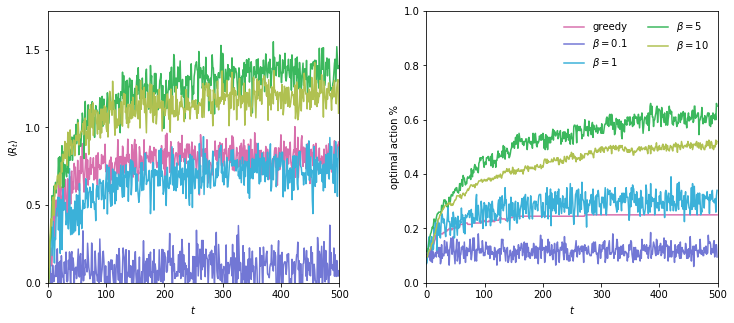

In [8]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.3)
fold_average_reward_ = np.zeros((t_max, n_fold))
ax1 = plt.subplot(121)
ax1.set_yticks([0,0.5,1,1.5,2])
plt.xlim(0, t_max)
plt.ylim(0, 1.75)
ax2 = plt.subplot(122)
plt.xlim(0, t_max)
plt.ylim(0, 1)

for idx, (l, B_) in enumerate([(r'greedy', X_), (r'$\beta=0.1$', Y_), (r'$\beta=1$', Z_), (r'$\beta=5$', W_), (r'$\beta=10$', S_)]):
    fold_average_optimal_fraction_ = np.zeros((t_max, n_fold))
    fold_average_reward_ = np.zeros((t_max, n_fold))
    for fold in range(n_fold):
        fold_average_optimal_fraction_[:,fold] += (np.array(B_[fold].action_history_) == np.argmax(reward_cache[fold]))*1
        fold_average_reward_[:,fold] = np.array(B_[fold].reward_history_)


    ax1.plot(range(t_max), fold_average_reward_.mean(axis=1), label=l, c=palettes[idx*2])
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$\langle R_t \rangle$')
    
    ax2.plot(range(t_max), fold_average_optimal_fraction_.sum(axis=1)/n_fold, label=l, c=palettes[idx*2])
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel('optimal action %')

ax2.legend(loc=0, ncol=2, frameon=False)
plt.show()